In [3]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

dbPath = r"C:\Users\Utilisateur\local_SIMPLON\SIMPLON_prairie\Brief 12012024 Développer une API REST pour exposer un modèle prédictif avec des données immobilières\dataSources"

In [4]:
path = pathlib.Path(dbPath)

arrays = dict(np.load(path / "transactions.npz"))
data = {k: [s.decode("utf-8") for s in v.tobytes().split(b"\x00")] if v.dtype == np.uint8 else v for k, v in arrays.items()}
df_transactions = pd.DataFrame.from_dict(data)

df_transactions.to_csv(r"dataSources\transactions.csv", header=True)

In [5]:
df_transactions = pd.read_csv(r'dataSources\transactions.csv')

if 'Unnamed: 0' in df_transactions.columns:
    df_transactions = df_transactions.drop('Unnamed: 0', axis=1)
    
df_transactions['prix_m2'] = df_transactions['prix'] / (df_transactions['surface_habitable'])

In [6]:
df_transactionsParis = df_transactions[(df_transactions.departement == 75) & (df_transactions.date_transaction.str.startswith('2022'))]
surface_cols = [c for c in df_transactionsParis.columns if 'surface_' in c and c != 'surface_habitable']
for c in surface_cols:
    df_transactionsParis[c + '_sum'] = df_transactionsParis[c].apply(lambda x: sum(eval(x)) if 'NULL' not in x else 0)
df_transactionsParis = df_transactionsParis[df_transactionsParis[[c + '_sum' for c in surface_cols]].sum(axis=1) == 0]

df_transactionsParis.head()

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,prix_m2,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum
6043985,10040024,2022-01-03,329910.0,75,112,PARIS 12,75012,260 AV DAUMESNIL,Appartement,False,...,{},{},{},{},10997.000000,0,0,0,0,0
6043986,10035062,2022-01-03,302400.0,75,102,PARIS 02,75002,52 RUE GRENETA,Appartement,False,...,{},{},{},{},11630.769231,0,0,0,0,0
6043987,10036657,2022-01-03,665000.0,75,117,PARIS 17,75017,26 BD DES BATIGNOLLES,Appartement,False,...,{},{},{},{},11271.186441,0,0,0,0,0
6043988,10035700,2022-01-03,965000.0,75,105,PARIS 05,75005,31 RUE CENSIER,Appartement,False,...,{},{},{},{},15317.460317,0,0,0,0,0
6043989,10029380,2022-01-03,200000.0,75,110,PARIS 10,75010,37 RUE DE PARADIS,Appartement,False,...,{},{},{},{},10526.315789,0,0,0,0,0


In [7]:
X = df_transactionsParis[['longitude', 'latitude']].values
y = df_transactionsParis['prix_m2'].values
print(X)

[[ 2.40375064 48.83624849]
 [ 2.348148   48.86560434]
 [ 2.32468916 48.88330859]
 ...
 [ 2.33382336 48.87932351]
 [ 2.36336334 48.8569176 ]
 [ 2.38413572 48.88687906]]


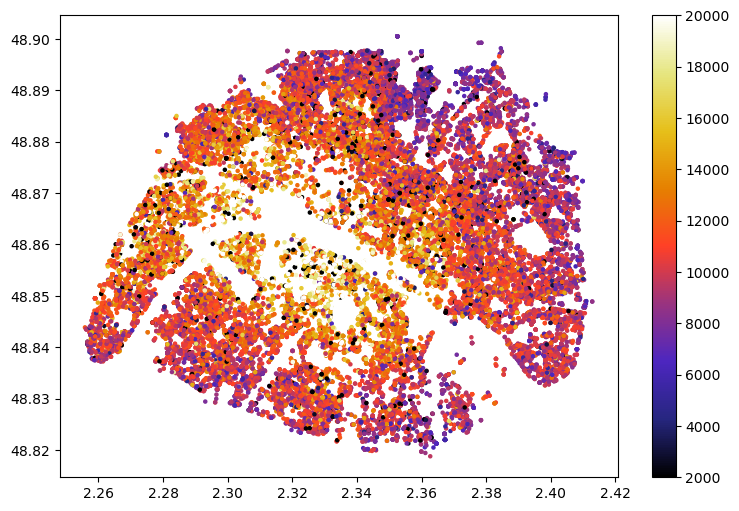

In [17]:
#df_transactionsParis.prix_m2.hist(bins=80)
colors = np.array(df_transactionsParis['prix_m2'])
plt.figure(figsize=(9,6))
plt.scatter(df_transactionsParis['longitude'],df_transactionsParis['latitude'], c=colors, vmin=2000, vmax=20000, cmap='CMRmap', s=5)
plt.colorbar()
plt.show()


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=4)
model_DecisionTreeRegressor.fit(X_train, y_train)

model_KNeighborsRegressor = KNeighborsRegressor(n_neighbors=50)
model_KNeighborsRegressor.fit(X_train, y_train)

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)

model_RandomForestRegressor = RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)
model_RandomForestRegressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)

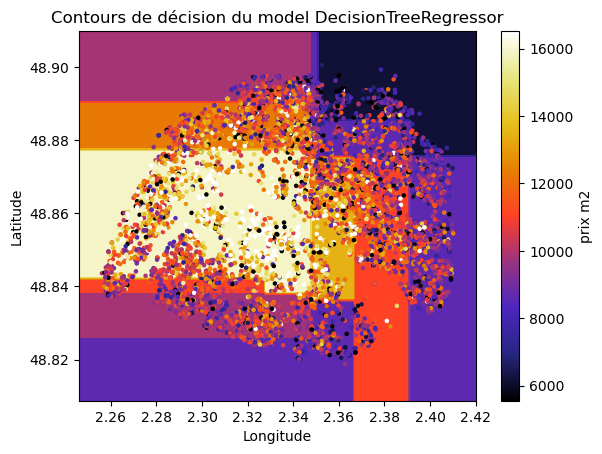

La MSE d'entrainement (sur 80% du dataset) du model DecisionTreeRegressor est d'environ 4087.72
La MSE de test (sur les 20% restant du dataset) du model DecisionTreeRegressor est d'environ 3658.07


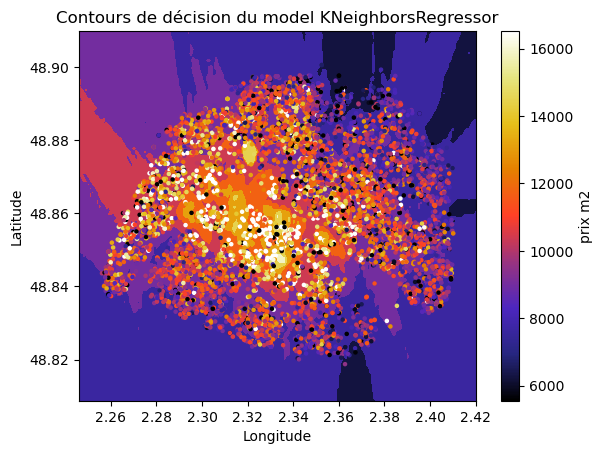

La MSE d'entrainement (sur 80% du dataset) du model KNeighborsRegressor est d'environ 3940.02
La MSE de test (sur les 20% restant du dataset) du model KNeighborsRegressor est d'environ 3462.46


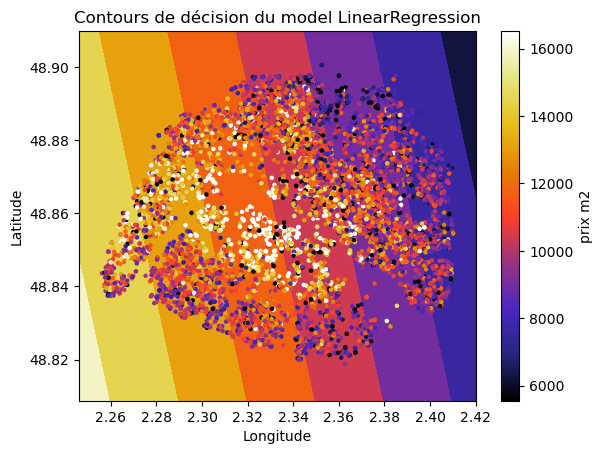

La MSE d'entrainement (sur 80% du dataset) du model LinearRegression est d'environ 4298.34
La MSE de test (sur les 20% restant du dataset) du model LinearRegression est d'environ 3770.65


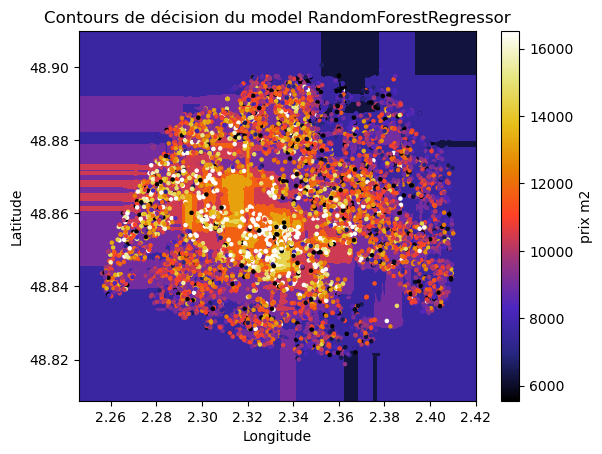

La MSE d'entrainement (sur 80% du dataset) du model RandomForestRegressor est d'environ 3572.99
La MSE de test (sur les 20% restant du dataset) du model RandomForestRegressor est d'environ 3468.44


In [23]:
def plot_with_contour(model, X, y):
    # Visualisation des contours de décision
    x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
        
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                        np.arange(y_min, y_max, 0.001))
        
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    plt.contourf(xx, yy, Z, alpha=1, cmap='CMRmap')
        
    # Normalize the colormap to ignore extreme values
    # sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=0, vmax=20_2000,
    #                 marker='o', s=5, linewidth=1, cmap='coolwarm')
        
    sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=np.percentile(y, 5), vmax=np.percentile(y, 95), 
                        marker='o', s=5, linewidth=1, cmap='CMRmap')
        
        
    plt.colorbar(sc, label='prix m2', orientation='vertical')
          
    plt.title(f"Contours de décision du model {str(model)[:x]}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

models = [model_DecisionTreeRegressor,model_KNeighborsRegressor, model_LinearRegression, model_RandomForestRegressor]

for model in models :
    x = str(model).find('(')  
    plot_with_contour(model, X_test, y_test)
    print(f"La MSE d'entrainement (sur 80% du dataset) du model {str(model)[:x]} est d'environ {round(np.sqrt(mean_squared_error(y_train, model.predict(X_train))),2)}")
    print(f"La MSE de test (sur les 20% restant du dataset) du model {str(model)[:x]} est d'environ {round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))),2)}")

In [26]:
from sklearn.model_selection import GridSearchCV

params_grid = {
                'LR': {
                    'model': LinearRegression(),
                    'params': {
                        'fit_intercept': [True, False],
                        'positive': [True, False]
                    }
                },
                'DTR': {
                    'model': DecisionTreeRegressor(),
                    'params': {
                        'max_depth': [1, 5, 10],
                        'min_samples_leaf': [5, 10, 20, 50, 100]
                    }
                },
                'RFR': {
                    'model': RandomForestRegressor(),
                    'params': {
                        'max_depth': [50, 100, 150],
                        'min_samples_leaf': [20, 50],
                        'n_estimators': [500, 1000]
                    }
                }
            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'])
    gs.fit(X_train, y_train)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test, gs.best_estimator_.predict(X_test))))

Modèle: LR avec params optimaux: {'fit_intercept': True, 'positive': False} donne erreur =
3770.649464963743


KeyboardInterrupt: 

In [16]:
with open("model/model_RandomForestRegressor.pkl", "wb") as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(model_RandomForestRegressor)